# Example: Batch Training of the Perceptron Classifier
This example will familiarize students with training the [Perceptron](https://en.wikipedia.org/wiki/Perceptron) to classify a linear separable data set $\mathcal{D}$. The [Perceptron](https://en.wikipedia.org/wiki/Perceptron) learns a linear decision boundary between 
two classes. There exists a data set
$\mathcal{D} = \left\{(\mathbf{x}_{1},y_{1}),\dotsc,(\mathbf{x}_{N},y_{N})\right\}$ with $N$ examples, with labels $y_{i}\in\{-1,1\}$, and features $\mathbf{x}_{i}\in\mathbb{R}^{n}$.
The Perceptron computes label $y$ for feature vector $\mathbf{x}$ as:
\begin{equation*}
    y = \text{sign}\left(\mathbf{w}^{T}\cdot\mathbf{x}\right)
\end{equation*}
where $\mathbf{w}=\left(w_{1},\dots,w_{N}, b\right)$ is a vector of weights $w$ and a bias $b$, 
$\mathbf{x}=\left(x_{1},\dots,x_{n}, 1\right)$ is a feature vector,
and $\text{sign}(z)$ is the sign function:
\begin{equation*}
    \text{sign}(z) = 
    \begin{cases}
        1 & \text{if}~z\geq{0}\\
        -1 & \text{if}~z<0
    \end{cases}
\end{equation*}
If data set $\mathcal{D}$ is linearly separable, the Perceptron will find a separating hyperplane in a finite number of passes 
through $\mathcal{D}$. However, if the data set $\mathcal{D}$ is not linearly separable, the Perceptron will not converge.

## Setup
This example requires several external libraries and a function to compute the outer product. Let's download and install these packages and call our `Include.jl` file.

In [1]:
include("Include.jl")

  Activating project at `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-14/L14c`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-14/L14c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-14/L14c/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-14/L14c/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-4800-5800-Examples-AY-2024/week-14/L14c/Manifest.toml`


## Prerequisites
Before we implement the [Perceptron](https://en.wikipedia.org/wiki/Perceptron) and its training algorithm, let's generate a random linearly separable dataset $\mathcal{D}$ which we'll use to train and test the [Perceptron](https://en.wikipedia.org/wiki/Perceptron).

In [2]:
N = 1000; # assume we have N-samples
n = 2; # we have n features

In [3]:
dataset = Set{@NamedTuple{x::Array{Float64,1},y::Int64}}(); 
w = randn(n+1);
classes = [-1,1];
should_keep_looping = true;
while (should_keep_looping == true)

    x = randn(n) |> x -> push!(x,1); # generate a feature vector
    y = rand(1:2) |> i-> classes[i]; # generate a class 
    
    # check -
    if (y*(sum(w.*x)) > 0.1)
        data = (x = x, y = y);
        push!(dataset,data);
    end

    # if we have enough examples, stop iterating
    if (length(dataset) >= N)
        should_keep_looping = false
    end
end

## Training

In [4]:
ŵ = rand(n+1); # initialize
while true
    
    error_counter = 0;
    for data ∈ dataset
        
        x = data[:x];
        y = data[:y];
        
        # check:
        if (y*sum(ŵ.*x)) < 0
            ŵ = ŵ .+ y*x;
            error_counter+=1        
        end
    end
    
    if (error_counter == 0)
        break;
    end
end

In [5]:
ŵ

3-element Vector{Float64}:
 -2.740832450609602
 -3.3086490740189225
 -1.7022293101805435

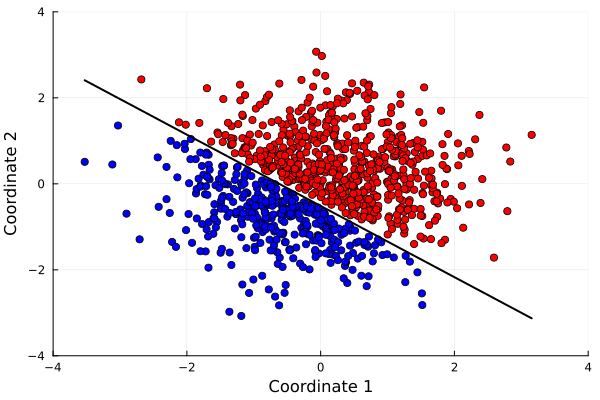

In [6]:
p = plot();
for data ∈ dataset

    x = data[:x];
    y = data[:y];
    if y == 1
        scatter!([x[1]],[x[2]], c=:blue, label="")
    else
        scatter!([x[1]],[x[2]], c=:red, label="")
    end
end

H = Array{Float64,2}(undef, N, 2);
i = 1;
for data ∈ dataset
    x = data[:x];
    x1 = x[1];
    x2 = -(ŵ[1]/ŵ[2])*x1 - ŵ[3]/ŵ[2];
    H[i,1] = x1;
    H[i,2] = x2;
    i += 1
end

plot!(H[:,1], H[:,2], xlims=(-4,4), ylims=(-4,4), lw=2, c=:black, label="")

xlabel!("Coordinate 1",fontsize=18)
ylabel!("Coordinate 2",fontsize=18)
current()

In [7]:
H

1000×2 Matrix{Float64}:
  1.31623    -1.60482
  0.734236   -1.12271
  1.94491    -2.12561
 -0.898965    0.23021
  0.559301   -0.977795
  1.17092    -1.48445
  1.7429     -1.95827
  1.80025    -2.00578
 -0.875585    0.210842
  0.373924   -0.824232
  1.09326    -1.42012
 -1.60413     0.814357
  0.644034   -1.04799
  ⋮          
 -1.31537     0.57515
 -0.322549   -0.247284
  0.55834    -0.976999
  0.469604   -0.903491
 -0.575499   -0.0377448
  0.468836   -0.902855
  2.77621    -2.81425
 -0.584027   -0.0306803
  0.489343   -0.919842
  0.0799576  -0.580714
 -1.79903     0.97581
  0.50111    -0.92959

In [10]:
[w ŵ]

3×2 Matrix{Float64}:
 -0.874222  -2.74083
 -1.059     -3.30865
 -0.493602  -1.70223